<h1>Importing Necessary Libraries</h1>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.svm import SVC


<h1>Loading the Dataset</h1>

In [4]:
data = pd.read_csv("data.csv", encoding='latin-1')
data = data[["class", "sms"]]
data.tail(-1)
data['length'] = data['sms'].apply(len)
data.head()


,class,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<h1>Pre-processing Function python</h1>

In [5]:
def pre_process(text):
    remove_punc = str.maketrans('', '', string.punctuation)
    text_no_punctuation = text.translate(remove_punc)
    
    english_stopwords = stopwords.words('english')
    filtered_words = [word for word in text_no_punctuation.split() if word.lower() not in english_stopwords]
    
    stemmer = SnowballStemmer("english")
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    processed_text = " ".join(stemmed_words)
    
    return processed_text


<h1> Text Vectorization </h1>

In [6]:
SMS_text = data['sms'].copy()
vectorizer = TfidfVectorizer(stop_words="english", lowercase=True)
features = vectorizer.fit_transform(SMS_text).toarray()


<h1>Splitting the Data</h1>

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, data['class'], test_size=0.25, random_state=42)

<h1>Training the SVM Model with Sigmoid Kernel</h1>

In [8]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(x_train, y_train)

prediction = svc.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9777458722182341


<h1> ROC Curve and AUC for Sigmoid Kernel </h1>

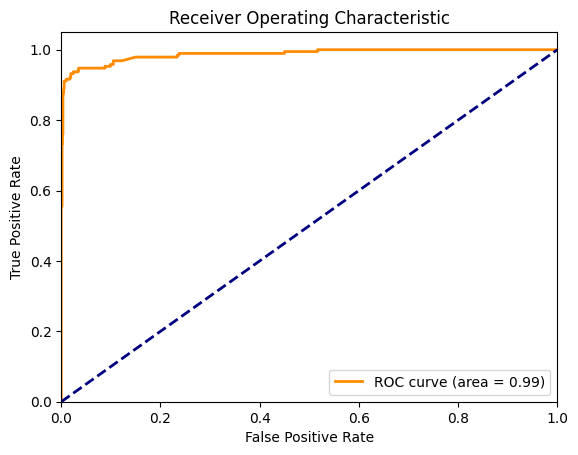

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(x_test), pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


<h1> ROC Curve and AUC for Sigmoid Kernel</h1>

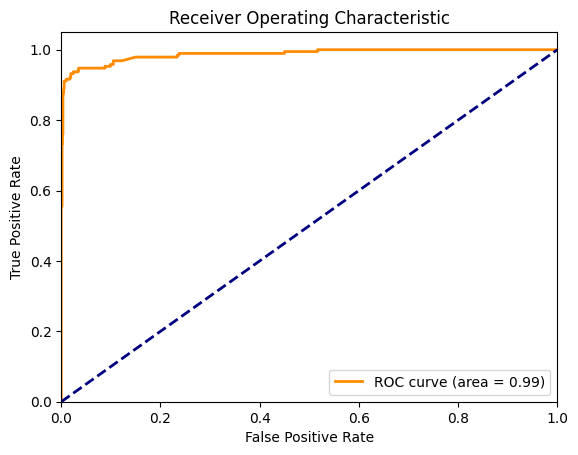

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(x_test), pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


<h1>Training the SVM Model with Linear Kernel</h1>

In [11]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

prediction = svc.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9777458722182341


<h1> ROC Curve and AUC for Linear Kernel
python
</h1>

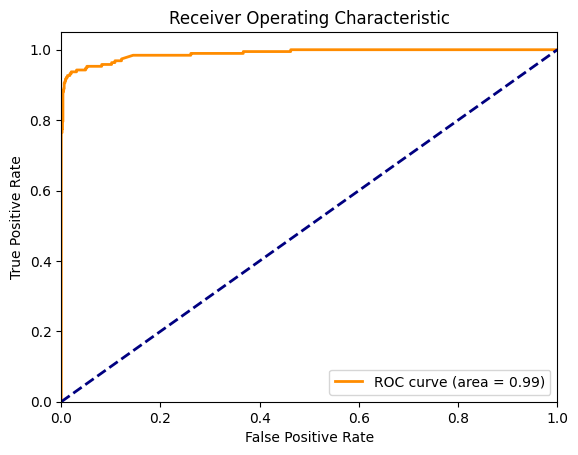

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(x_test), pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
